In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from keras.utils.np_utils import to_categorical
import seaborn as sns
from keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
print('Finsihed loading libs')

Finsihed loading libs


In [2]:
fileName= "allDataMean.csv"
df = pd.read_csv(fileName)
print(df.shape)
print(df.columns)

(184426, 16)
Index(['allDataMean1', 'Voltage', 'Current', 'Power', 'Frequency', 'Energy',
       'FP', 'ESP32_temp', 'WORKSTATION_CPU', 'WORKSTATION_CPU_POWER',
       'WORKSTATION_CPU_TEMP', 'WORKSTATION_GPU', 'WORKSTATION_GPU_POWER',
       'WORKSTATION_GPU_TEMP', 'WORKSTATION_RAM', 'WORKSTATION_RAM_POWER'],
      dtype='object')


In [3]:
df.head()

allDataMean1     Voltage   Current       Power  Frequency    Energy  \
0           3.0  120.006557  0.968525  101.468852  59.978689  0.380328   
1           3.0  120.006557  0.972787  102.250820  59.990164  0.006230   
2           3.0  120.037705  0.958689  100.242623  60.000000  0.020000   
3           3.0  120.027869  0.944262   98.113115  59.963934  0.020000   
4           3.0  120.037705  0.943115   97.857377  59.967213  0.020000   

         FP  ESP32_temp  WORKSTATION_CPU  WORKSTATION_CPU_POWER  \
0  0.873279         0.0              0.0                    0.0   
1  0.876230         0.0              0.0                    0.0   
2  0.870328         0.0              0.0                    0.0   
3  0.865246         0.0              0.0                    0.0   
4  0.863115         0.0              0.0                    0.0   

   WORKSTATION_CPU_TEMP  WORKSTATION_GPU  WORKSTATION_GPU_POWER  \
0                   0.0              0.0                    0.0   
1                   0.0              0.0                    0.0   
2                   0.0              0.0                    0.0   
3                   0.0              0.0                    0.0   
4                   0.0              0.0                    0.0   

   WORKSTATION_GPU_TEMP  WORKSTATION_RAM  WORKSTATION_RAM_POWER  
0                   0.0              0.0                    0.0  
1                   0.0              0.0                    0.0  
2                   0.0              0.0                    0.0  
3                   0.0              0.0                    0.0  
4                   0.0              0.0                    0.0

In [4]:
df.describe()

allDataMean1        Voltage        Current          Power  \
count  184426.000000  184426.000000  184426.000000  184426.000000   
mean        4.103394     120.021228       0.820289      87.187038   
std         1.988289       0.270607       0.227190      25.488845   
min         1.000000     118.265574       0.020000       0.000000   
25%         2.000000     120.000000       0.686393      77.095082   
50%         4.000000     120.052459       0.922131      94.952459   
75%         6.000000     120.122951       0.941967      97.831148   
max         7.000000     120.522951       1.402623     156.755738   

           Frequency         Energy             FP     ESP32_temp  \
count  184426.000000  184426.000000  184426.000000  184426.000000   
mean       59.964679     122.334941       0.860265      24.100945   
std         0.023111      82.832466       0.139007      15.902589   
min        59.800000       0.006230       0.000000       0.000000   
25%        59.949180      43.000287       0.860000       0.000000   
50%        59.967213     127.970000       0.895410      31.904508   
75%        59.981967     180.066148       0.904098      33.844098   
max        60.067213     432.503377       0.971311      53.333300   

       WORKSTATION_CPU  WORKSTATION_CPU_POWER  WORKSTATION_CPU_TEMP  \
count    184426.000000          184426.000000         184426.000000   
mean          1.996956              11.359958              8.665053   
std           3.183677              17.367542             13.393789   
min           0.000000               0.000000              0.000000   
25%           0.000000               0.000000              0.000000   
50%           0.000000               0.000000              0.000000   
75%           4.678975              36.920000             26.393443   
max          44.016393              44.581148             56.442623   

       WORKSTATION_GPU  WORKSTATION_GPU_POWER  WORKSTATION_GPU_TEMP  \
count    184426.000000          184426.000000         184426.000000   
mean          0.035802              10.114905              3.892158   
std           0.184194              15.469822              6.125859   
min           0.000000               0.000000              0.000000   
25%           0.000000               0.000000              0.000000   
50%           0.000000               0.000000              0.000000   
75%           0.000000              33.000000              8.210820   
max           8.737705              38.442623             25.008689   

       WORKSTATION_RAM  WORKSTATION_RAM_POWER  
count    184426.000000          184426.000000  
mean         14.775249               2.428889  
std          18.447626               3.870338  
min           0.000000               0.000000  
25%           0.000000               0.000000  
50%           0.000000               0.000000  
75%          35.816352               6.537008  
max          54.904918              17.512131

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184426 entries, 0 to 184425
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   allDataMean1           184426 non-null  float64
 1   Voltage                184426 non-null  float64
 2   Current                184426 non-null  float64
 3   Power                  184426 non-null  float64
 4   Frequency              184426 non-null  float64
 5   Energy                 184426 non-null  float64
 6   FP                     184426 non-null  float64
 7   ESP32_temp             184426 non-null  float64
 8   WORKSTATION_CPU        184426 non-null  float64
 9   WORKSTATION_CPU_POWER  184426 non-null  float64
 10  WORKSTATION_CPU_TEMP   184426 non-null  float64
 11  WORKSTATION_GPU        184426 non-null  float64
 12  WORKSTATION_GPU_POWER  184426 non-null  float64
 13  WORKSTATION_GPU_TEMP   184426 non-null  float64
 14  WORKSTATION_RAM        184426 non-nu

In [6]:
df.isnull().sum()

allDataMean1             0
Voltage                  0
Current                  0
Power                    0
Frequency                0
Energy                   0
FP                       0
ESP32_temp               0
WORKSTATION_CPU          0
WORKSTATION_CPU_POWER    0
WORKSTATION_CPU_TEMP     0
WORKSTATION_GPU          0
WORKSTATION_GPU_POWER    0
WORKSTATION_GPU_TEMP     0
WORKSTATION_RAM          0
WORKSTATION_RAM_POWER    0
dtype: int64

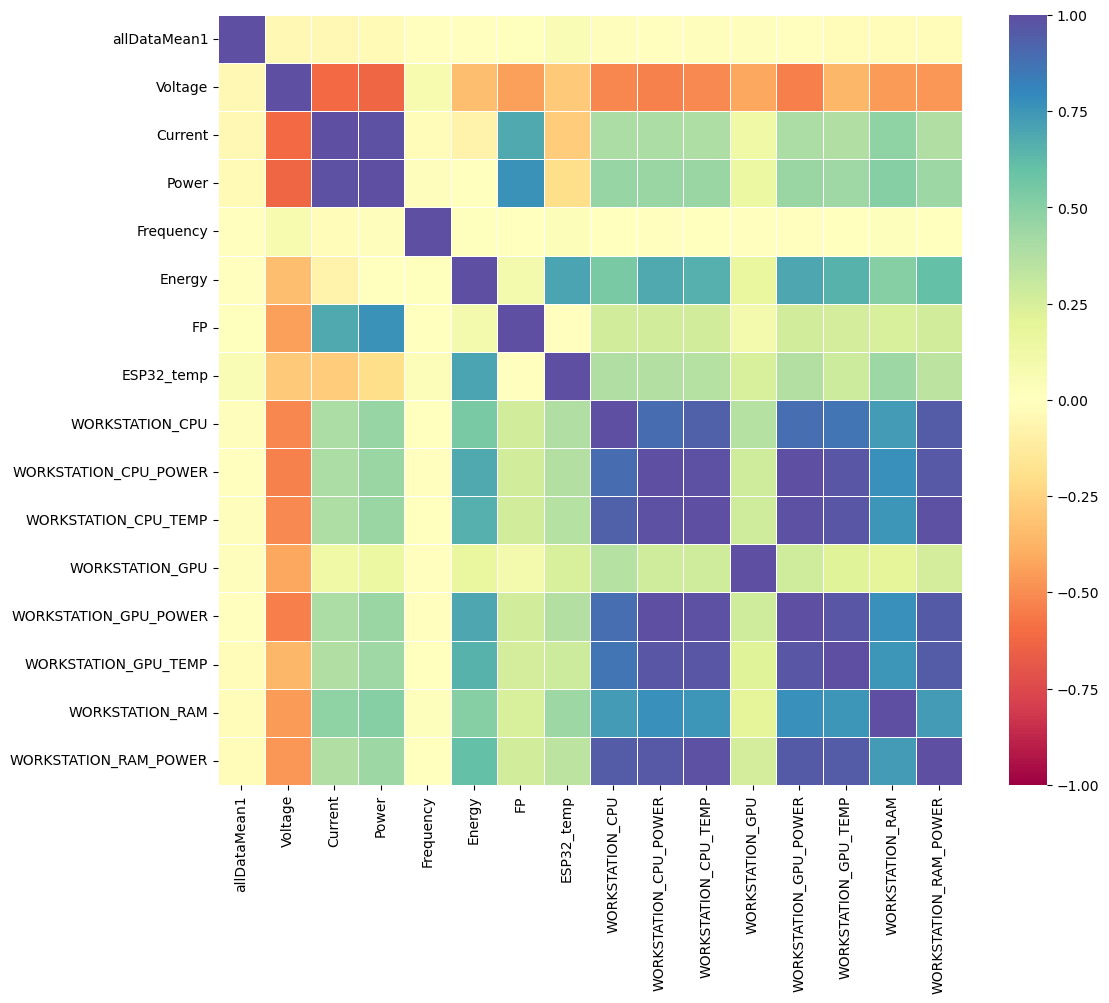

In [7]:
corr = df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr,linewidths=0.5,cmap="Spectral",vmin=-1, vmax=1)
plt.show()

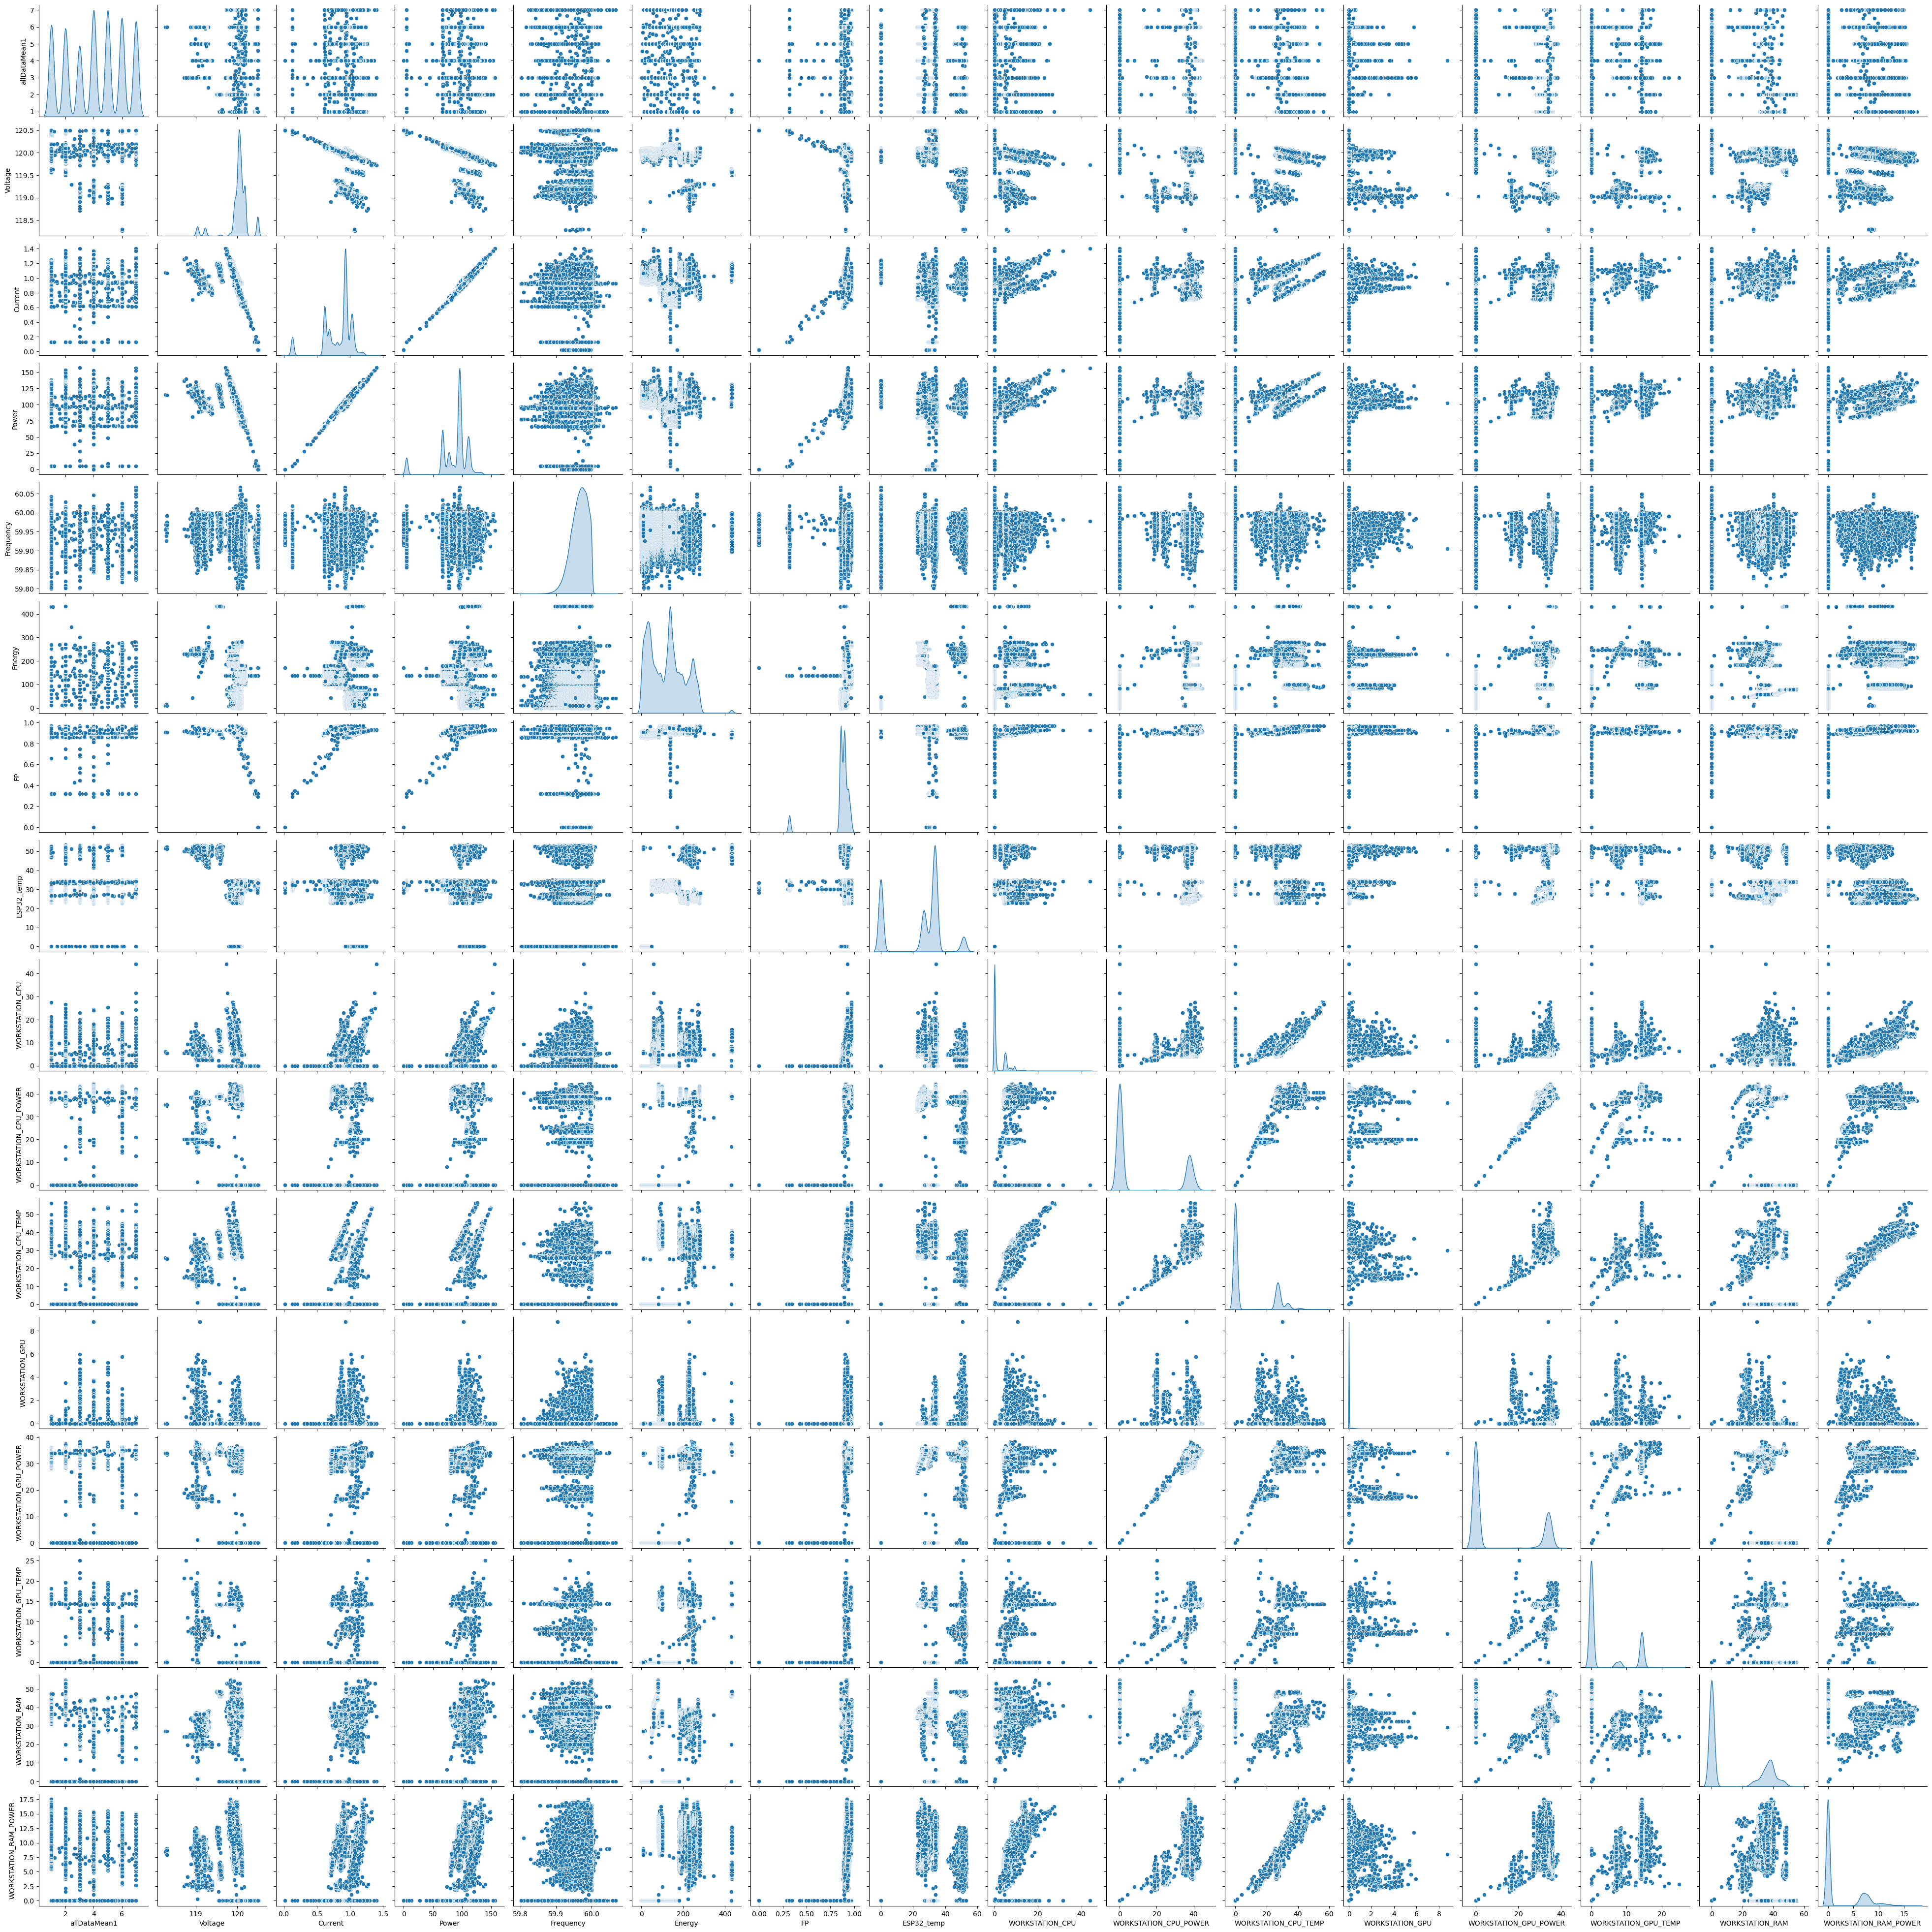

In [8]:
sns.pairplot(data= df, diag_kind='kde')

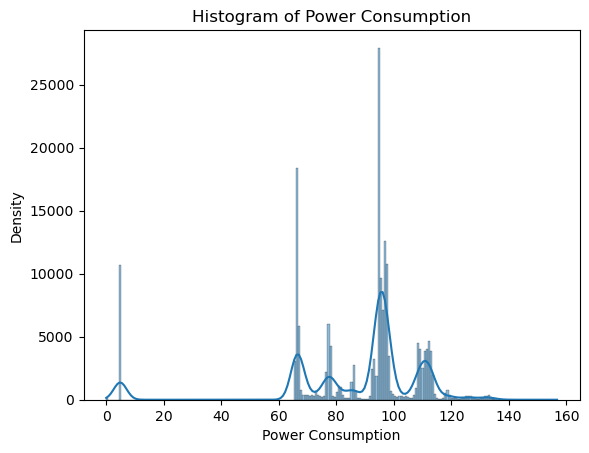

In [9]:
sns.histplot(data=df, x='Power', kde=True)  
plt.xlabel('Power Consumption')
plt.ylabel('Density')
plt.title('Histogram of Power Consumption')
plt.show()

In [10]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Power']
Predictors=['ESP32_temp', 'Energy',
       'FP', 'WORKSTATION_CPU', 'WORKSTATION_CPU_POWER',
       'WORKSTATION_GPU', 'WORKSTATION_GPU_POWER',
       'WORKSTATION_GPU_TEMP', 'WORKSTATION_RAM', 'WORKSTATION_RAM_POWER']
 
X=df[Predictors].values
y=df[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(147540, 10)
(147540, 1)
(36886, 10)
(36886, 1)


In [11]:
from sklearn.linear_model import LinearRegression


linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

y_pred = linear_regression.predict(X_test)

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Metrics to evaluate the model 
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.8842417097901246, 0.22718578859031313, 0.3408247296875448)

In [13]:
print(df.shape)

(184426, 16)


In [14]:
# Scaling the predicted Price data back to original price scale
y_pred=TargetVarScalerFit.inverse_transform(y_pred)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Power']=y_test_orig
TestingData['PredictedPower']=y_pred
TestingData.head()

ESP32_temp      Energy        FP  WORKSTATION_CPU  WORKSTATION_CPU_POWER  \
0    0.000000   46.300000  0.870984     2.220446e-16                   0.00   
1    0.000000    9.560000  0.860656     2.220446e-16                   0.00   
2   32.166066   78.260000  0.863115     6.622951e-01                   0.00   
3   49.171195  230.433492  0.898033     9.507049e+00                  20.00   
4   27.156885  248.780000  0.899016     5.203279e+00                  37.72   

   WORKSTATION_GPU  WORKSTATION_GPU_POWER  WORKSTATION_GPU_TEMP  \
0         0.000000               0.000000          4.440892e-16   
1         0.000000               0.000000          4.440892e-16   
2         0.000000               0.000000          4.440892e-16   
3         4.442623              17.557377          7.547541e+00   
4         0.016393              34.360656          1.441967e+01   

   WORKSTATION_RAM  WORKSTATION_RAM_POWER       Power  PredictedPower  
0         0.000000               0.000000  102.978689       96.712364  
1         0.000000               0.000000   96.588525       95.823908  
2        48.200000               0.000000   96.859016      103.926702  
3        23.177705               4.148361  105.193443      111.683355  
4        39.343607               6.792623  111.467213      104.851595

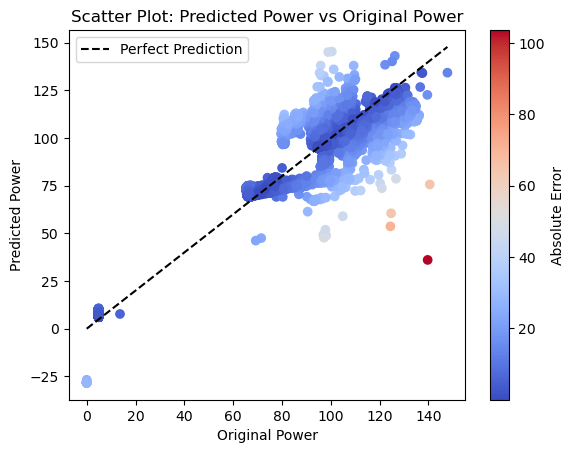

In [15]:

x_line = np.linspace(min(TestingData['Power']), max(TestingData['Power']), 100)
y_line = x_line

plt.scatter(TestingData['Power'], TestingData['PredictedPower'], c=np.abs(TestingData['Power'] - TestingData['PredictedPower']), cmap='coolwarm')
plt.colorbar(label='Absolute Error')

# Plot the line of perfect prediction
plt.plot(x_line, y_line, color='black', linestyle='--', label='Perfect Prediction')

plt.xlabel('Original Power')
plt.ylabel('Predicted Power')
plt.title('Scatter Plot: Predicted Power vs Original Power')
plt.legend()
plt.show()

In [16]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Power']
Predictors=['ESP32_temp', 'Energy',
       'FP', 'WORKSTATION_CPU', 'WORKSTATION_CPU_POWER',
       'WORKSTATION_GPU', 'WORKSTATION_GPU_POWER',
       'WORKSTATION_GPU_TEMP', 'WORKSTATION_RAM', 'WORKSTATION_RAM_POWER']
 
X=df[Predictors].values
y=df[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(147540, 10)
(147540, 1)
(36886, 10)
(36886, 1)


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.9989734885789432, 0.00940344311249026, 0.03209496748671922)

In [18]:
y_pred = y_pred.reshape(-1, 1)

# Scaling the predicted Price data back to original price scale
y_pred=TargetVarScalerFit.inverse_transform(y_pred)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Power']=y_test_orig
TestingData['PredictedPower']=y_pred
TestingData.head()

ESP32_temp      Energy        FP  WORKSTATION_CPU  WORKSTATION_CPU_POWER  \
0    0.000000   46.300000  0.870984     2.220446e-16                   0.00   
1    0.000000    9.560000  0.860656     2.220446e-16                   0.00   
2   32.166066   78.260000  0.863115     6.622951e-01                   0.00   
3   49.171195  230.433492  0.898033     9.507049e+00                  20.00   
4   27.156885  248.780000  0.899016     5.203279e+00                  37.72   

   WORKSTATION_GPU  WORKSTATION_GPU_POWER  WORKSTATION_GPU_TEMP  \
0         0.000000               0.000000          4.440892e-16   
1         0.000000               0.000000          4.440892e-16   
2         0.000000               0.000000          4.440892e-16   
3         4.442623              17.557377          7.547541e+00   
4         0.016393              34.360656          1.441967e+01   

   WORKSTATION_RAM  WORKSTATION_RAM_POWER       Power  PredictedPower  
0         0.000000               0.000000  102.978689      100.173771  
1         0.000000               0.000000   96.588525       96.495082  
2        48.200000               0.000000   96.859016       96.963934  
3        23.177705               4.148361  105.193443      107.060656  
4        39.343607               6.792623  111.467213      111.785246

In [19]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Power']
Predictors=['ESP32_temp', 'Energy',
       'FP', 'WORKSTATION_CPU', 'WORKSTATION_CPU_POWER',
       'WORKSTATION_GPU', 'WORKSTATION_GPU_POWER',
       'WORKSTATION_GPU_TEMP', 'WORKSTATION_RAM', 'WORKSTATION_RAM_POWER']
 
X=df[Predictors].values
y=df[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(147540, 10)
(147540, 1)
(36886, 10)
(36886, 1)


In [20]:
# Random Forest
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

C:\Users\jihad qutteineh\AppData\Local\Temp\ipykernel_15348\1584205606.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


(0.9993525615386146, 0.007188838797384931, 0.02548908789237621)

In [21]:
y_pred = y_pred.reshape(-1, 1)

# Scaling the predicted Price data back to original price scale
y_pred=TargetVarScalerFit.inverse_transform(y_pred)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Power']=y_test_orig
TestingData['PredictedPower']=y_pred
TestingData.head()

ESP32_temp      Energy        FP  WORKSTATION_CPU  WORKSTATION_CPU_POWER  \
0    0.000000   46.300000  0.870984     2.220446e-16                   0.00   
1    0.000000    9.560000  0.860656     2.220446e-16                   0.00   
2   32.166066   78.260000  0.863115     6.622951e-01                   0.00   
3   49.171195  230.433492  0.898033     9.507049e+00                  20.00   
4   27.156885  248.780000  0.899016     5.203279e+00                  37.72   

   WORKSTATION_GPU  WORKSTATION_GPU_POWER  WORKSTATION_GPU_TEMP  \
0         0.000000               0.000000          4.440892e-16   
1         0.000000               0.000000          4.440892e-16   
2         0.000000               0.000000          4.440892e-16   
3         4.442623              17.557377          7.547541e+00   
4         0.016393              34.360656          1.441967e+01   

   WORKSTATION_RAM  WORKSTATION_RAM_POWER       Power  PredictedPower  
0         0.000000               0.000000  102.978689      100.157557  
1         0.000000               0.000000   96.588525       96.588929  
2        48.200000               0.000000   96.859016       97.054672  
3        23.177705               4.148361  105.193443      110.128475  
4        39.343607               6.792623  111.467213      111.516771

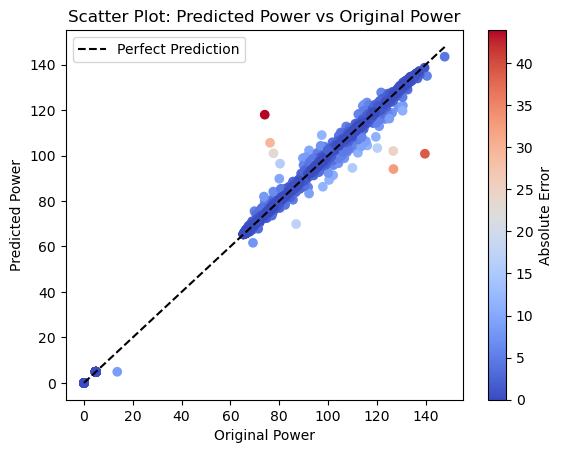

In [22]:

x_line = np.linspace(min(TestingData['Power']), max(TestingData['Power']), 100)
y_line = x_line

plt.scatter(TestingData['Power'], TestingData['PredictedPower'], c=np.abs(TestingData['Power'] - TestingData['PredictedPower']), cmap='coolwarm')
plt.colorbar(label='Absolute Error')

# Plot the line of perfect prediction
plt.plot(x_line, y_line, color='black', linestyle='--', label='Perfect Prediction')

plt.xlabel('Original Power')
plt.ylabel('Predicted Power')
plt.title('Scatter Plot: Predicted Power vs Original Power')
plt.legend()
plt.show()

In [23]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Power']-TestingData['PredictedPower'])/TestingData['Power'])
TestingData['APE']=APE
 
TestingData.head()

ESP32_temp      Energy        FP  WORKSTATION_CPU  WORKSTATION_CPU_POWER  \
0    0.000000   46.300000  0.870984     2.220446e-16                   0.00   
1    0.000000    9.560000  0.860656     2.220446e-16                   0.00   
2   32.166066   78.260000  0.863115     6.622951e-01                   0.00   
3   49.171195  230.433492  0.898033     9.507049e+00                  20.00   
4   27.156885  248.780000  0.899016     5.203279e+00                  37.72   

   WORKSTATION_GPU  WORKSTATION_GPU_POWER  WORKSTATION_GPU_TEMP  \
0         0.000000               0.000000          4.440892e-16   
1         0.000000               0.000000          4.440892e-16   
2         0.000000               0.000000          4.440892e-16   
3         4.442623              17.557377          7.547541e+00   
4         0.016393              34.360656          1.441967e+01   

   WORKSTATION_RAM  WORKSTATION_RAM_POWER       Power  PredictedPower  \
0         0.000000               0.000000  102.978689      100.157557   
1         0.000000               0.000000   96.588525       96.588929   
2        48.200000               0.000000   96.859016       97.054672   
3        23.177705               4.148361  105.193443      110.128475   
4        39.343607               6.792623  111.467213      111.516771   

        APE  
0  2.739529  
1  0.000419  
2  0.202001  
3  4.691388  
4  0.044459